In [5]:
import torch
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%cd ../Projekt-Magisterski/
from workspace.pose_3d.dataset import KeypointsMatrix
from torch.utils.data import DataLoader
import numpy as np
from matplotlib import pyplot

/raid/s175668/Praca-Magisterska/Repozytorium/Projekt-Magisterski


In [6]:
def plot(score, results):
    print('Accuracy: %.3f' % score)
    pyplot.plot(results['validation_0']['logloss'], label='train')
    pyplot.plot(results['validation_1']['logloss'], label='test')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [7]:
def data_loading(training_set, test_set):
    x_train, y_train = [], []
    for idx in range(len(training_set)):
        x, y = training_set[idx]
        x_train.append(x.flatten())
        y_train.append(y.flatten())

    x_train, y_train = np.stack(x_train, axis=0), np.stack(y_train, axis=0)

    x_test, y_test = [], []
    for idx in range(len(test_set)):
        x, y = test_set[idx]
        x_test.append(x.flatten())
        y_test.append(y.flatten())

    x_test, y_test = np.stack(x_test, axis=0), np.stack(y_test, axis=0)
    
    return x_train, y_train, x_test, y_test

In [8]:
# define the model
def model_train(n_estimators, eta, max_depth, subsample, colsample_bytree):
    
    x_train, y_train, x_test, y_test = data_loading(training_set, test_set)
    
    model = XGBClassifier(n_estimators=n_estimators,
                          eta=eta,
                          max_depth=max_depth,
                          subsample = subsample,
                          colsample_bytree=colsample_bytree,
                          gamma = 1,
                          early_stopping_rounds=10,
                          gpu_id=3,
                          random_state=1,
                          tree_method='gpu_hist',
                         )

    # define the datasets to evaluate each iteration
    evalset = [(x_train, y_train), (x_test,y_test)]

    model.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset)

    # evaluate performance
    yhat = model.predict(x_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: %.3f' % score)
    results = model.evals_result()
    return score, results

# 001_side_base

In [9]:
training_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/train_made_balance.csv', camera='side')
test_set = KeypointsMatrix('/home/s175668/raid/Praca-Magisterska/dataset/folds/made/val_made_balance.csv', camera='side')

# First trainining - learning rate - 0.01

In [10]:
score, results = model_train(n_estimators=1000, eta=0.01, max_depth=3, subsample=0.8, colsample_bytree=0.5)

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69186	validation_1-logloss:0.69233
[1]	validation_0-logloss:0.69055	validation_1-logloss:0.69138
[2]	validation_0-logloss:0.68930	validation_1-logloss:0.69051
[3]	validation_0-logloss:0.68807	validation_1-logloss:0.68964
[4]	validation_0-logloss:0.68685	validation_1-logloss:0.68856
[5]	validation_0-logloss:0.68573	validation_1-logloss:0.68752
[6]	validation_0-logloss:0.68455	validation_1-logloss:0.68666
[7]	validation_0-logloss:0.68345	validation_1-logloss:0.68595
[8]	validation_0-logloss:0.68227	validation_1-logloss:0.68512
[9]	validation_0-logloss:0.68117	validation_1-logloss:0.68439
[10]	validation_0-logloss:0.68007	validation_1-logloss:0.68355
[11]	validation_0-logloss:0.67900	validation_1-logloss:0.68266
[12]	validation_0-logloss:0.67793	validation_1-logloss:0.68186
[13]	validation_0-logloss:0.67687	validation_1-logloss:0.68111
[14]	validation_0-logloss:0.67578	validation_1-logloss:0.68033
[15]	validation_0-logloss:0.67470	validation_1-logloss:0.67945
[1

[130]	validation_0-logloss:0.60915	validation_1-logloss:0.64123
[131]	validation_0-logloss:0.60884	validation_1-logloss:0.64112
[132]	validation_0-logloss:0.60851	validation_1-logloss:0.64097
[133]	validation_0-logloss:0.60822	validation_1-logloss:0.64091
[134]	validation_0-logloss:0.60785	validation_1-logloss:0.64085
[135]	validation_0-logloss:0.60756	validation_1-logloss:0.64081
[136]	validation_0-logloss:0.60723	validation_1-logloss:0.64066
[137]	validation_0-logloss:0.60696	validation_1-logloss:0.64063
[138]	validation_0-logloss:0.60663	validation_1-logloss:0.64057
[139]	validation_0-logloss:0.60634	validation_1-logloss:0.64039
[140]	validation_0-logloss:0.60601	validation_1-logloss:0.64026
[141]	validation_0-logloss:0.60568	validation_1-logloss:0.64026
[142]	validation_0-logloss:0.60537	validation_1-logloss:0.64018
[143]	validation_0-logloss:0.60507	validation_1-logloss:0.64005
[144]	validation_0-logloss:0.60477	validation_1-logloss:0.63992
[145]	validation_0-logloss:0.60444	valid

[259]	validation_0-logloss:0.57688	validation_1-logloss:0.63482
[260]	validation_0-logloss:0.57664	validation_1-logloss:0.63482
[261]	validation_0-logloss:0.57639	validation_1-logloss:0.63473
[262]	validation_0-logloss:0.57619	validation_1-logloss:0.63468
[263]	validation_0-logloss:0.57599	validation_1-logloss:0.63461
[264]	validation_0-logloss:0.57578	validation_1-logloss:0.63466
[265]	validation_0-logloss:0.57563	validation_1-logloss:0.63465
[266]	validation_0-logloss:0.57546	validation_1-logloss:0.63466
[267]	validation_0-logloss:0.57527	validation_1-logloss:0.63458
[268]	validation_0-logloss:0.57504	validation_1-logloss:0.63453
[269]	validation_0-logloss:0.57488	validation_1-logloss:0.63448
[270]	validation_0-logloss:0.57468	validation_1-logloss:0.63445
[271]	validation_0-logloss:0.57449	validation_1-logloss:0.63441
[272]	validation_0-logloss:0.57424	validation_1-logloss:0.63433
[273]	validation_0-logloss:0.57410	validation_1-logloss:0.63427
[274]	validation_0-logloss:0.57393	valid

Accuracy: 0.655


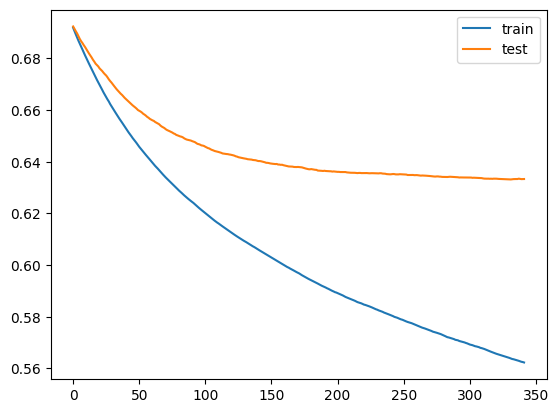

In [11]:
plot(score, results)

# First trainining - learning rate - 0.01, max_depth - 4

In [12]:
score, results = model_train(n_estimators=1000, eta=0.01, max_depth=4, subsample=0.8, colsample_bytree=0.5)

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69156	validation_1-logloss:0.69232
[1]	validation_0-logloss:0.68992	validation_1-logloss:0.69147
[2]	validation_0-logloss:0.68834	validation_1-logloss:0.69070
[3]	validation_0-logloss:0.68680	validation_1-logloss:0.68977
[4]	validation_0-logloss:0.68528	validation_1-logloss:0.68868
[5]	validation_0-logloss:0.68386	validation_1-logloss:0.68766
[6]	validation_0-logloss:0.68239	validation_1-logloss:0.68676
[7]	validation_0-logloss:0.68103	validation_1-logloss:0.68600
[8]	validation_0-logloss:0.67956	validation_1-logloss:0.68503
[9]	validation_0-logloss:0.67825	validation_1-logloss:0.68425
[10]	validation_0-logloss:0.67688	validation_1-logloss:0.68338
[11]	validation_0-logloss:0.67555	validation_1-logloss:0.68245
[12]	validation_0-logloss:0.67424	validation_1-logloss:0.68157
[13]	validation_0-logloss:0.67290	validation_1-logloss:0.68078
[14]	validation_0-logloss:0.67156	validation_1-logloss:0.67991
[15]	validation_0-logloss:0.67021	validation_1-logloss:0.67904
[1

[130]	validation_0-logloss:0.57972	validation_1-logloss:0.63960
[131]	validation_0-logloss:0.57930	validation_1-logloss:0.63944
[132]	validation_0-logloss:0.57886	validation_1-logloss:0.63929
[133]	validation_0-logloss:0.57839	validation_1-logloss:0.63918
[134]	validation_0-logloss:0.57779	validation_1-logloss:0.63902
[135]	validation_0-logloss:0.57735	validation_1-logloss:0.63893
[136]	validation_0-logloss:0.57682	validation_1-logloss:0.63883
[137]	validation_0-logloss:0.57642	validation_1-logloss:0.63874
[138]	validation_0-logloss:0.57589	validation_1-logloss:0.63874
[139]	validation_0-logloss:0.57540	validation_1-logloss:0.63874
[140]	validation_0-logloss:0.57487	validation_1-logloss:0.63869
[141]	validation_0-logloss:0.57444	validation_1-logloss:0.63876
[142]	validation_0-logloss:0.57403	validation_1-logloss:0.63868
[143]	validation_0-logloss:0.57354	validation_1-logloss:0.63848
[144]	validation_0-logloss:0.57306	validation_1-logloss:0.63837
[145]	validation_0-logloss:0.57252	valid

Accuracy: 0.653


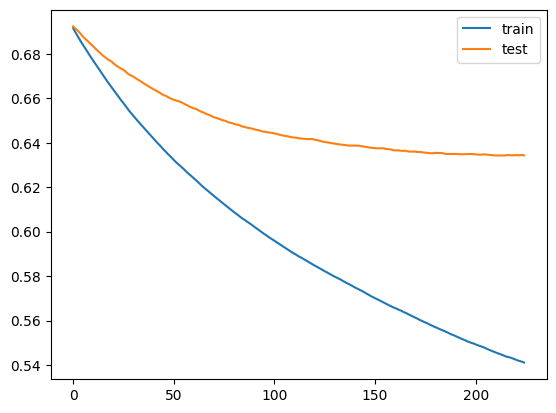

In [13]:
plot(score, results)

# First trainining - learning rate - 0.01, max_depth - 6

In [14]:
score, results = model_train(n_estimators=1000, eta=0.01, max_depth=6, subsample=0.8, colsample_bytree=0.5)

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69075	validation_1-logloss:0.69221
[1]	validation_0-logloss:0.68838	validation_1-logloss:0.69172
[2]	validation_0-logloss:0.68602	validation_1-logloss:0.69078
[3]	validation_0-logloss:0.68384	validation_1-logloss:0.68976
[4]	validation_0-logloss:0.68165	validation_1-logloss:0.68857
[5]	validation_0-logloss:0.67950	validation_1-logloss:0.68749
[6]	validation_0-logloss:0.67729	validation_1-logloss:0.68645
[7]	validation_0-logloss:0.67522	validation_1-logloss:0.68584
[8]	validation_0-logloss:0.67286	validation_1-logloss:0.68464
[9]	validation_0-logloss:0.67075	validation_1-logloss:0.68363
[10]	validation_0-logloss:0.66860	validation_1-logloss:0.68263
[11]	validation_0-logloss:0.66658	validation_1-logloss:0.68163
[12]	validation_0-logloss:0.66442	validation_1-logloss:0.68085
[13]	validation_0-logloss:0.66244	validation_1-logloss:0.67969
[14]	validation_0-logloss:0.66041	validation_1-logloss:0.67882
[15]	validation_0-logloss:0.65841	validation_1-logloss:0.67792
[1

[130]	validation_0-logloss:0.50102	validation_1-logloss:0.63465
[131]	validation_0-logloss:0.50032	validation_1-logloss:0.63452
[132]	validation_0-logloss:0.49947	validation_1-logloss:0.63439
[133]	validation_0-logloss:0.49844	validation_1-logloss:0.63418
[134]	validation_0-logloss:0.49742	validation_1-logloss:0.63406
[135]	validation_0-logloss:0.49653	validation_1-logloss:0.63391
[136]	validation_0-logloss:0.49557	validation_1-logloss:0.63367
[137]	validation_0-logloss:0.49468	validation_1-logloss:0.63376
[138]	validation_0-logloss:0.49356	validation_1-logloss:0.63371
[139]	validation_0-logloss:0.49275	validation_1-logloss:0.63361
[140]	validation_0-logloss:0.49175	validation_1-logloss:0.63343
[141]	validation_0-logloss:0.49086	validation_1-logloss:0.63316
[142]	validation_0-logloss:0.48992	validation_1-logloss:0.63308
[143]	validation_0-logloss:0.48913	validation_1-logloss:0.63295
[144]	validation_0-logloss:0.48826	validation_1-logloss:0.63291
[145]	validation_0-logloss:0.48722	valid

Accuracy: 0.664


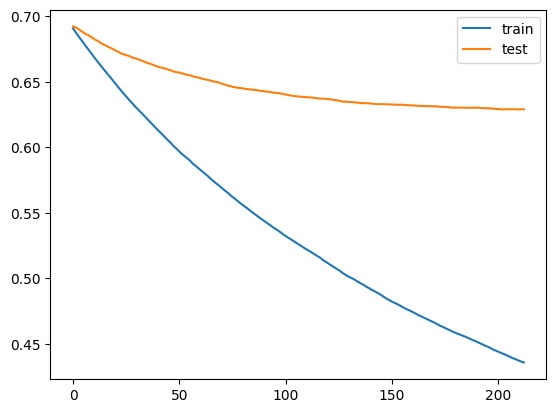

In [15]:
plot(score, results)

# First trainining - learning rate - 0.01, max_depth - 8

In [16]:
score, results = model_train(n_estimators=1000, eta=0.01, max_depth=8, subsample=0.8, colsample_bytree=0.5)

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68975	validation_1-logloss:0.69201
[1]	validation_0-logloss:0.68658	validation_1-logloss:0.69143
[2]	validation_0-logloss:0.68324	validation_1-logloss:0.69042
[3]	validation_0-logloss:0.68040	validation_1-logloss:0.68942
[4]	validation_0-logloss:0.67749	validation_1-logloss:0.68802
[5]	validation_0-logloss:0.67448	validation_1-logloss:0.68698
[6]	validation_0-logloss:0.67140	validation_1-logloss:0.68598
[7]	validation_0-logloss:0.66845	validation_1-logloss:0.68525
[8]	validation_0-logloss:0.66519	validation_1-logloss:0.68392
[9]	validation_0-logloss:0.66223	validation_1-logloss:0.68290
[10]	validation_0-logloss:0.65930	validation_1-logloss:0.68195
[11]	validation_0-logloss:0.65648	validation_1-logloss:0.68103
[12]	validation_0-logloss:0.65329	validation_1-logloss:0.68027
[13]	validation_0-logloss:0.65052	validation_1-logloss:0.67922
[14]	validation_0-logloss:0.64767	validation_1-logloss:0.67826
[15]	validation_0-logloss:0.64487	validation_1-logloss:0.67720
[1

[130]	validation_0-logloss:0.42273	validation_1-logloss:0.63380
[131]	validation_0-logloss:0.42156	validation_1-logloss:0.63374
[132]	validation_0-logloss:0.42036	validation_1-logloss:0.63367
[133]	validation_0-logloss:0.41903	validation_1-logloss:0.63346
[134]	validation_0-logloss:0.41771	validation_1-logloss:0.63340
[135]	validation_0-logloss:0.41633	validation_1-logloss:0.63337
[136]	validation_0-logloss:0.41515	validation_1-logloss:0.63322
[137]	validation_0-logloss:0.41404	validation_1-logloss:0.63317
[138]	validation_0-logloss:0.41250	validation_1-logloss:0.63289
[139]	validation_0-logloss:0.41111	validation_1-logloss:0.63261
[140]	validation_0-logloss:0.40960	validation_1-logloss:0.63250
[141]	validation_0-logloss:0.40833	validation_1-logloss:0.63241
[142]	validation_0-logloss:0.40712	validation_1-logloss:0.63222
[143]	validation_0-logloss:0.40604	validation_1-logloss:0.63208
[144]	validation_0-logloss:0.40478	validation_1-logloss:0.63179
[145]	validation_0-logloss:0.40342	valid

Accuracy: 0.673


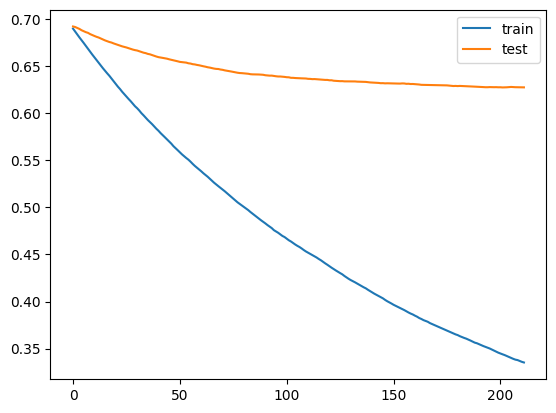

In [17]:
plot(score, results)

# First trainining - learning rate - 0.01, max_depth - 10

In [18]:
score, results = model_train(n_estimators=1000, eta=0.01, max_depth=10, subsample=0.8, colsample_bytree=0.5)

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68888	validation_1-logloss:0.69207
[1]	validation_0-logloss:0.68481	validation_1-logloss:0.69145
[2]	validation_0-logloss:0.68056	validation_1-logloss:0.69058
[3]	validation_0-logloss:0.67710	validation_1-logloss:0.68959
[4]	validation_0-logloss:0.67314	validation_1-logloss:0.68810
[5]	validation_0-logloss:0.66943	validation_1-logloss:0.68688
[6]	validation_0-logloss:0.66544	validation_1-logloss:0.68582
[7]	validation_0-logloss:0.66179	validation_1-logloss:0.68490
[8]	validation_0-logloss:0.65777	validation_1-logloss:0.68359
[9]	validation_0-logloss:0.65442	validation_1-logloss:0.68268
[10]	validation_0-logloss:0.65077	validation_1-logloss:0.68187
[11]	validation_0-logloss:0.64706	validation_1-logloss:0.68103
[12]	validation_0-logloss:0.64322	validation_1-logloss:0.68017
[13]	validation_0-logloss:0.63971	validation_1-logloss:0.67910
[14]	validation_0-logloss:0.63602	validation_1-logloss:0.67828
[15]	validation_0-logloss:0.63276	validation_1-logloss:0.67740
[1

[130]	validation_0-logloss:0.36937	validation_1-logloss:0.63368
[131]	validation_0-logloss:0.36812	validation_1-logloss:0.63363
[132]	validation_0-logloss:0.36671	validation_1-logloss:0.63361
[133]	validation_0-logloss:0.36499	validation_1-logloss:0.63369
[134]	validation_0-logloss:0.36330	validation_1-logloss:0.63343
[135]	validation_0-logloss:0.36173	validation_1-logloss:0.63340
[136]	validation_0-logloss:0.36034	validation_1-logloss:0.63339
[137]	validation_0-logloss:0.35898	validation_1-logloss:0.63346
[138]	validation_0-logloss:0.35741	validation_1-logloss:0.63334
[139]	validation_0-logloss:0.35595	validation_1-logloss:0.63334
[140]	validation_0-logloss:0.35422	validation_1-logloss:0.63353
[141]	validation_0-logloss:0.35287	validation_1-logloss:0.63353
[142]	validation_0-logloss:0.35147	validation_1-logloss:0.63349
[143]	validation_0-logloss:0.35012	validation_1-logloss:0.63343
[144]	validation_0-logloss:0.34862	validation_1-logloss:0.63349
[145]	validation_0-logloss:0.34724	valid

Accuracy: 0.654


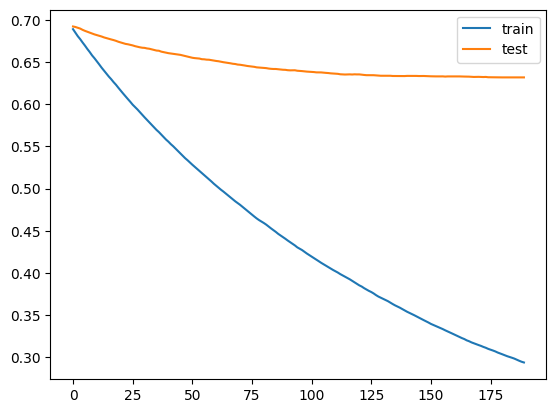

In [19]:
plot(score, results)

## Third training - 0.001 

In [20]:
eta = 0.001
n_estimators = 2000
x_train, y_train, x_test, y_test = data_loading(training_set, test_set)
best_score = 0
best_result = None
best_hyperparameters = []

for depth in [3, 6, 7, 8, 9]:
    for subsample in [0.2, 0.4, 0.6, 0.8, 1]:
        for tree in [0.2, 0.4, 0.6, 0.8, 1]:
            score, results = model_train(x_train, y_train, x_test, y_test, n_estimators=n_estimators, eta=eta, max_depth=depth, subsample=subsample, colsample_bytree=tree)
            if score > best_score:
                best_result = results
                best_score = best_score
                best_hyperparameters.append(['001_side', score*100, n_estimators, eta, depth, subsample, tree])

df_001_side_and_under_base = pd.DataFrame(best_hyperparameters, columns=['run', 'score', 'runs', 'eta', 'max_depth', 'subsample', 'tree'])

/raid/s175668/Praca-Magisterska/srodowisko/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69291	validation_1-logloss:0.69305
[1]	validation_0-logloss:0.69269	validation_1-logloss:0.69297
[2]	validation_0-logloss:0.69244	validation_1-logloss:0.69288
[3]	validation_0-logloss:0.69222	validation_1-logloss:0.69277
[4]	validation_0-logloss:0.69198	validation_1-logloss:0.69265
[5]	validation_0-logloss:0.69175	validation_1-logloss:0.69253
[6]	validation_0-logloss:0.69152	validation_1-logloss:0.69245
[7]	validation_0-logloss:0.69130	validation_1-logloss:0.69236
[8]	validation_0-logloss:0.69104	validation_1-logloss:0.69222
[9]	validation_0-logloss:0.69081	validation_1-logloss:0.69210
[10]	validation_0-logloss:0.69057	validation_1-logloss:0.69201
[11]	validation_0-logloss:0.69034	validation_1-logloss:0.69191
[12]	validation_0-logloss:0.69009	validation_1-logloss:0.69181
[13]	validation_0-logloss:0.68986	validation_1-logloss:0.69171
[14]	validation_0-logloss:0.68962	validation_1-logloss:0.69160
[15]	validation_0-logloss:0.68940	validation_1-logloss:0.69149
[1

[130]	validation_0-logloss:0.66371	validation_1-logloss:0.67983
[131]	validation_0-logloss:0.66349	validation_1-logloss:0.67972
[132]	validation_0-logloss:0.66327	validation_1-logloss:0.67960
[133]	validation_0-logloss:0.66308	validation_1-logloss:0.67952
[134]	validation_0-logloss:0.66286	validation_1-logloss:0.67942
[135]	validation_0-logloss:0.66267	validation_1-logloss:0.67935
[136]	validation_0-logloss:0.66246	validation_1-logloss:0.67924
[137]	validation_0-logloss:0.66228	validation_1-logloss:0.67914
[138]	validation_0-logloss:0.66205	validation_1-logloss:0.67904
[139]	validation_0-logloss:0.66186	validation_1-logloss:0.67897
[140]	validation_0-logloss:0.66165	validation_1-logloss:0.67888
[141]	validation_0-logloss:0.66146	validation_1-logloss:0.67879
[142]	validation_0-logloss:0.66125	validation_1-logloss:0.67870
[143]	validation_0-logloss:0.66104	validation_1-logloss:0.67861
[144]	validation_0-logloss:0.66085	validation_1-logloss:0.67851
[145]	validation_0-logloss:0.66066	valid

[259]	validation_0-logloss:0.63836	validation_1-logloss:0.66936
[260]	validation_0-logloss:0.63818	validation_1-logloss:0.66927
[261]	validation_0-logloss:0.63798	validation_1-logloss:0.66920
[262]	validation_0-logloss:0.63781	validation_1-logloss:0.66911
[263]	validation_0-logloss:0.63761	validation_1-logloss:0.66906
[264]	validation_0-logloss:0.63743	validation_1-logloss:0.66901
[265]	validation_0-logloss:0.63724	validation_1-logloss:0.66894
[266]	validation_0-logloss:0.63705	validation_1-logloss:0.66886
[267]	validation_0-logloss:0.63686	validation_1-logloss:0.66877
[268]	validation_0-logloss:0.63669	validation_1-logloss:0.66870
[269]	validation_0-logloss:0.63648	validation_1-logloss:0.66863
[270]	validation_0-logloss:0.63629	validation_1-logloss:0.66854
[271]	validation_0-logloss:0.63610	validation_1-logloss:0.66846
[272]	validation_0-logloss:0.63590	validation_1-logloss:0.66837
[273]	validation_0-logloss:0.63571	validation_1-logloss:0.66831
[274]	validation_0-logloss:0.63553	valid

[388]	validation_0-logloss:0.61566	validation_1-logloss:0.66065
[389]	validation_0-logloss:0.61550	validation_1-logloss:0.66058
[390]	validation_0-logloss:0.61533	validation_1-logloss:0.66054
[391]	validation_0-logloss:0.61516	validation_1-logloss:0.66048
[392]	validation_0-logloss:0.61503	validation_1-logloss:0.66042
[393]	validation_0-logloss:0.61486	validation_1-logloss:0.66034
[394]	validation_0-logloss:0.61468	validation_1-logloss:0.66029
[395]	validation_0-logloss:0.61454	validation_1-logloss:0.66022
[396]	validation_0-logloss:0.61438	validation_1-logloss:0.66019
[397]	validation_0-logloss:0.61421	validation_1-logloss:0.66017
[398]	validation_0-logloss:0.61405	validation_1-logloss:0.66010
[399]	validation_0-logloss:0.61388	validation_1-logloss:0.66007
[400]	validation_0-logloss:0.61371	validation_1-logloss:0.66000
[401]	validation_0-logloss:0.61354	validation_1-logloss:0.65994
[402]	validation_0-logloss:0.61339	validation_1-logloss:0.65988
[403]	validation_0-logloss:0.61323	valid

[517]	validation_0-logloss:0.59535	validation_1-logloss:0.65379
[518]	validation_0-logloss:0.59519	validation_1-logloss:0.65377
[519]	validation_0-logloss:0.59506	validation_1-logloss:0.65371
[520]	validation_0-logloss:0.59490	validation_1-logloss:0.65367
[521]	validation_0-logloss:0.59473	validation_1-logloss:0.65363
[522]	validation_0-logloss:0.59458	validation_1-logloss:0.65359
[523]	validation_0-logloss:0.59444	validation_1-logloss:0.65353
[524]	validation_0-logloss:0.59428	validation_1-logloss:0.65349
[525]	validation_0-logloss:0.59414	validation_1-logloss:0.65344
[526]	validation_0-logloss:0.59398	validation_1-logloss:0.65341
[527]	validation_0-logloss:0.59384	validation_1-logloss:0.65337
[528]	validation_0-logloss:0.59367	validation_1-logloss:0.65330
[529]	validation_0-logloss:0.59352	validation_1-logloss:0.65326
[530]	validation_0-logloss:0.59336	validation_1-logloss:0.65319
[531]	validation_0-logloss:0.59322	validation_1-logloss:0.65314
[532]	validation_0-logloss:0.59308	valid

[646]	validation_0-logloss:0.57672	validation_1-logloss:0.64816
[647]	validation_0-logloss:0.57660	validation_1-logloss:0.64811
[648]	validation_0-logloss:0.57647	validation_1-logloss:0.64808
[649]	validation_0-logloss:0.57633	validation_1-logloss:0.64803
[650]	validation_0-logloss:0.57619	validation_1-logloss:0.64798
[651]	validation_0-logloss:0.57604	validation_1-logloss:0.64794
[652]	validation_0-logloss:0.57591	validation_1-logloss:0.64789
[653]	validation_0-logloss:0.57577	validation_1-logloss:0.64784
[654]	validation_0-logloss:0.57564	validation_1-logloss:0.64778
[655]	validation_0-logloss:0.57551	validation_1-logloss:0.64775
[656]	validation_0-logloss:0.57540	validation_1-logloss:0.64771
[657]	validation_0-logloss:0.57527	validation_1-logloss:0.64767
[658]	validation_0-logloss:0.57514	validation_1-logloss:0.64762
[659]	validation_0-logloss:0.57501	validation_1-logloss:0.64759
[660]	validation_0-logloss:0.57485	validation_1-logloss:0.64754
[661]	validation_0-logloss:0.57470	valid

[775]	validation_0-logloss:0.55972	validation_1-logloss:0.64366
[776]	validation_0-logloss:0.55962	validation_1-logloss:0.64364
[777]	validation_0-logloss:0.55948	validation_1-logloss:0.64360
[778]	validation_0-logloss:0.55937	validation_1-logloss:0.64355
[779]	validation_0-logloss:0.55925	validation_1-logloss:0.64353
[780]	validation_0-logloss:0.55914	validation_1-logloss:0.64349
[781]	validation_0-logloss:0.55900	validation_1-logloss:0.64345
[782]	validation_0-logloss:0.55887	validation_1-logloss:0.64342
[783]	validation_0-logloss:0.55874	validation_1-logloss:0.64340
[784]	validation_0-logloss:0.55860	validation_1-logloss:0.64335
[785]	validation_0-logloss:0.55847	validation_1-logloss:0.64334
[786]	validation_0-logloss:0.55835	validation_1-logloss:0.64329
[787]	validation_0-logloss:0.55822	validation_1-logloss:0.64325
[788]	validation_0-logloss:0.55808	validation_1-logloss:0.64323
[789]	validation_0-logloss:0.55795	validation_1-logloss:0.64320
[790]	validation_0-logloss:0.55782	valid

[904]	validation_0-logloss:0.54383	validation_1-logloss:0.63986
[905]	validation_0-logloss:0.54372	validation_1-logloss:0.63985
[906]	validation_0-logloss:0.54361	validation_1-logloss:0.63984
[907]	validation_0-logloss:0.54348	validation_1-logloss:0.63980
[908]	validation_0-logloss:0.54337	validation_1-logloss:0.63977
[909]	validation_0-logloss:0.54327	validation_1-logloss:0.63973
[910]	validation_0-logloss:0.54314	validation_1-logloss:0.63971
[911]	validation_0-logloss:0.54303	validation_1-logloss:0.63970
[912]	validation_0-logloss:0.54291	validation_1-logloss:0.63968
[913]	validation_0-logloss:0.54280	validation_1-logloss:0.63967
[914]	validation_0-logloss:0.54268	validation_1-logloss:0.63966
[915]	validation_0-logloss:0.54256	validation_1-logloss:0.63963
[916]	validation_0-logloss:0.54245	validation_1-logloss:0.63959
[917]	validation_0-logloss:0.54233	validation_1-logloss:0.63958
[918]	validation_0-logloss:0.54221	validation_1-logloss:0.63957
[919]	validation_0-logloss:0.54210	valid

Accuracy: 0.664


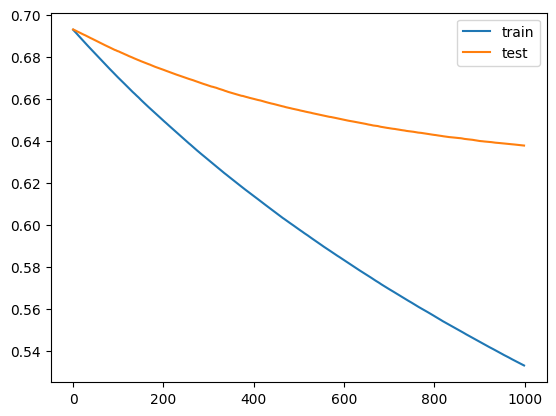

In [21]:
plot(score, results)